In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
# %matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
# mpl.rc('text', usetex=True)

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from skimage import feature, filters, measure

In [3]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

In [4]:
tp1 = pims.open('../data/R04_t001.tif')
background1 = tp1[1].clip(-2500, 10000)

tp2 = pims.open('../data/R04_t002.tif')
background2 = tp2[1].clip(-2500, 10000)

tp3 = pims.open('../data/R04_t003.tif')
background3 = tp3[1].clip(-2500, 10000)

tp4 = pims.open('../data/R04_t004.tif')
background4 = tp4[1].clip(-2500, 10000)

In [5]:
thresh0 = filters.threshold_otsu(frames[0])
thresh1 = filters.threshold_otsu(frames[1])
thresh2 = filters.threshold_otsu(frames[2])
thresh3 = filters.threshold_otsu(frames[3])

threshim0 = np.array(frames[0]) > thresh0
threshim1 = np.array(frames[1]) > thresh1
threshim2 = np.array(frames[2]) > thresh2
threshim3 = np.array(frames[3]) > thresh3

# fig, axes = plt.subplots(1, 4, sharey=True)
# axes[0].imshow(threshim0)
# axes[1].imshow(threshim1)
# axes[2].imshow(threshim2)
# axes[3].imshow(threshim3)

In [6]:
f = tp.locate(frames[1], 7)
# detect features

In [7]:
f.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
1,9.000000,902.000000,867.621009,1.025227,0.299290,199.855670,1438.0,0.0,1
2,11.448216,474.000000,3535.703985,1.344999,0.049888,530.738222,7195.0,0.0,1
3,13.788933,864.562931,5854.338465,1.573161,0.167871,631.676966,12960.0,0.0,1
4,14.999900,550.000000,870.229807,1.025786,0.298987,200.333950,1441.0,0.0,1
5,16.000000,251.000000,871.121146,1.025894,0.298950,200.486129,1442.0,0.0,1
6,18.000000,65.000000,872.838605,1.026244,0.298816,200.812229,1444.0,0.0,1
7,17.995435,228.000273,876.208302,1.029211,0.294932,201.007889,1455.0,0.0,1
8,18.000000,572.000000,874.556063,1.026544,0.298683,201.138329,1446.0,0.0,1
9,20.231898,265.286967,2996.748050,1.275611,0.365140,477.366562,5788.0,0.0,1
10,20.000000,723.000000,876.251782,1.026856,0.298518,201.442689,1448.0,0.0,1


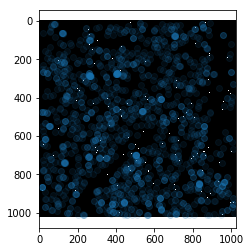

In [8]:
results = feature.peak_local_max(frames[1], min_distance=10)

plt.figure()
plt.imshow(threshim1)
plt.scatter(results[...,0], results[...,1], alpha=0.1)

In [9]:
# labels = p2(frames[1])

In [10]:
# database = p3(labels)

In [11]:
label_im = measure.label(frames[3])

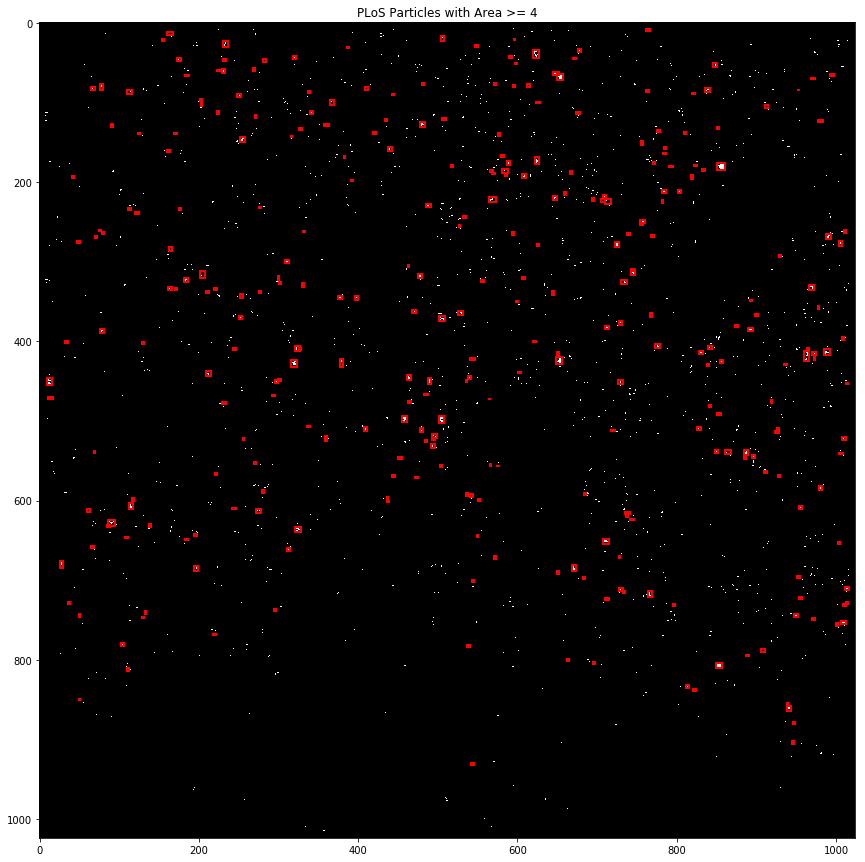

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
# plt.tight_layout()
ax.set_title('PLoS Particles with Area >= 4')
ax.imshow(frames[3]>0)

for region in measure.regionprops(label_im, frames[3]>0):
    # take regions with large enough areas
    if region.area >= 4:
        # draw rectangle around segmented points
        minr, minc, maxr, maxc = region.bbox
        rect = mpl.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
fig.savefig("../figures/skimage_size.svg")

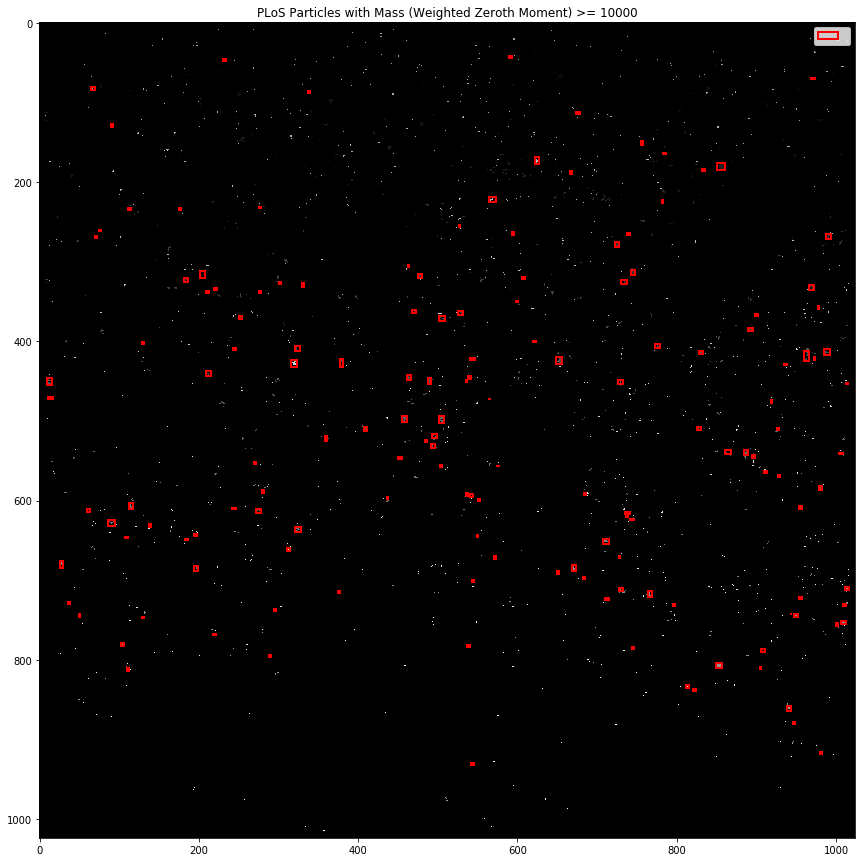

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
# plt.tight_layout()
ax.set_title('PLoS Particles with Mass (Weighted Zeroth Moment) >= 10000')
ax.imshow(frames[3])

for region in measure.regionprops(label_im, frames[3]):
    # take regions with large enough areas
    if region.weighted_moments[0][0] >= 10000:
        # draw rectangle around segmented points
        minr, minc, maxr, maxc = region.bbox
        rect = mpl.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
plt.legend(handles=[rect])
        
fig.savefig("../figures/skimage_mass_10000.svg")

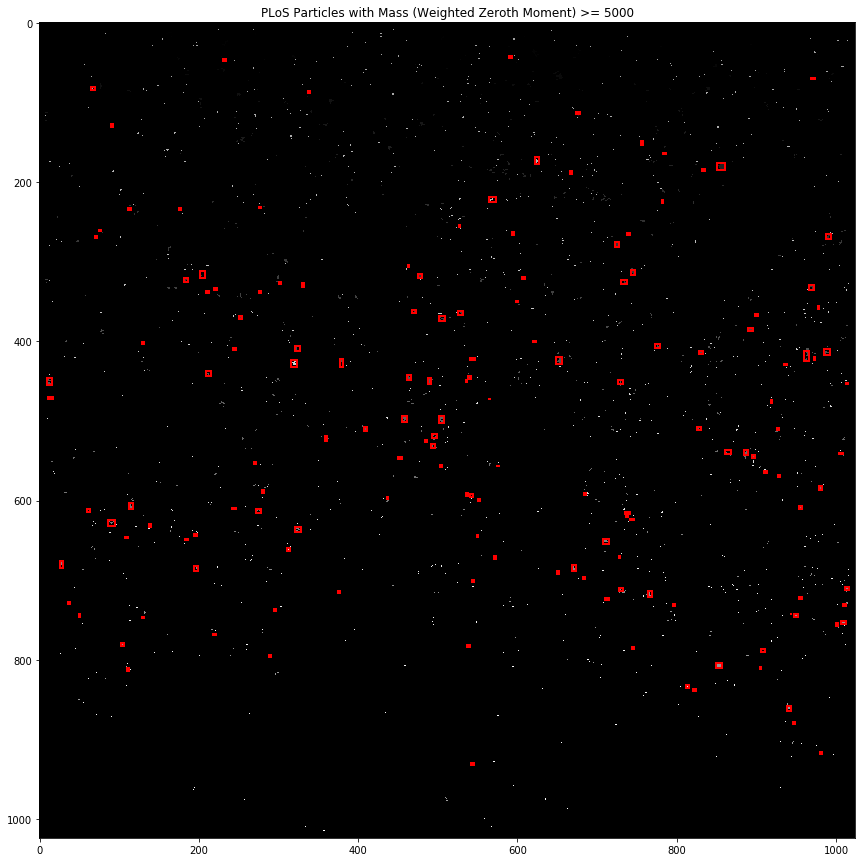

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
# plt.tight_layout()
ax.set_title('PLoS Particles with Mass (Weighted Zeroth Moment) >= 5000')
ax.imshow(frames[3])

for region in measure.regionprops(label_im, frames[3]):
    # take regions with large enough areas
    if region.weighted_moments[0][0] >= 10000:
#         print(region.weighted_moments[0][0])
        # draw rectangle around segmented points
        minr, minc, maxr, maxc = region.bbox
        rect = mpl.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
fig.savefig("../figures/skimage_mass_5000.svg")

(array([683., 864., 272., 107.,  61.,  29.,  20.,   5.,   9.,   6.,   4.,
          2.,   3.,   2.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.]),
 array([2.00000e+00, 2.55040e+03, 5.09880e+03, 7.64720e+03, 1.01956e+04,
        1.27440e+04, 1.52924e+04, 1.78408e+04, 2.03892e+04, 2.29376e+04,
        2.54860e+04, 2.80344e+04, 3.05828e+04, 3.31312e+04, 3.56796e+04,
        3.82280e+04, 4.07764e+04, 4.33248e+04, 4.58732e+04, 4.84216e+04,
        5.09700e+04, 5.35184e+04, 5.60668e+04, 5.86152e+04, 6.11636e+04,
        6.37120e+04]),
 <a list of 25 Patch objects>)

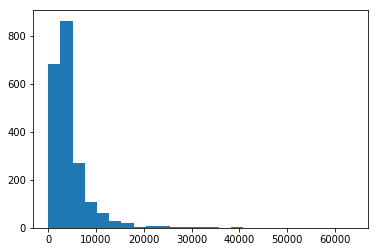

In [17]:
mass = []
for region in measure.regionprops(label_im, frames[3]):
    mass.append(region.weighted_moments[0][0])

plt.hist(mass, bins=25)

In [14]:
print(bloblog1[:, :2])

[[1015.  550.]
 [1015.  477.]
 [1015.  458.]
 ...
 [  12.  474.]
 [   9.  902.]
 [   9.  551.]]


In [15]:
bloblog2 = feature.blob_log(threshim2)

In [16]:
print(bloblog2[:, :2])

[[1008.  460.]
 [1004.  935.]
 [1002.  937.]
 ...
 [  11.  964.]
 [  10.  454.]
 [   8.  893.]]


In [17]:
print(database)

NameError: name 'database' is not defined